# CS356R Wireless Measurement Project 1

## Objectives
<!--  You are expected to accomplish this lab project by your own. -->
* To experimentally monitor the physical layer characteristics of a wireless channel between multiple devices operating on a wireless local area network (Wi-Fi). Specifically, you will perform:
    - LOS Experiment: An experiment observing the change in (1) signal strength and (2) data rate as distance is varied when the receiver and transmitter are in line of sight of each other 
    - NLOS Experiment: An experiment observing the change in (1) signal strength and (2) data rate as distance is varied when the receiver and transmitter are not in line of sight of each other; and contrast these measurements with the line of sight data 
    - Your Experiment: An experiment of your design to collect interesting data and present your findings

* To use these experimental results to gain an insight in both the physical environment's impacts on radio frequency (RF) signals and wireless challenges.


## Preliminary Checklist
Big Picture: Using Wireshark, monitor two devices communicating over Wi-Fi.

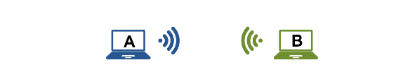

Diagram of Experiment Setup: Device A is running Wireshark, Device B is an access point communicating with Device A.

In a typical setup, Device A could be your laptop with Wireshark installed, while Device B could be the access point that your laptop is associated with.

### Check for Monitor Mode Support
Monitor mode allows a wireless card to monitor all the traffic transferring over a specific wireless channel, including physical layer data. You can read about it [here](https://wiki.wireshark.org/CaptureSetup/WLAN#802-11-filter-modes). Not all laptops support monitor mode; it is very dependent on the wireless card and the wireless chipset inside.

#### macOS
macOS laptops use Apple’s own wireless adapters, and most of them support Monitor Mode (10.4.x and above). See [here](https://wiki.wireshark.org/CaptureSetup/WLAN#macos-mac-os-x) for more information. You can confirm monitor mode support by following the instructions for macOS [here](https://techwiser.com/check-if-wireless-adapter-supports-monitor-mode/).

#### Linux
1. Install wireless-tools with `sudo apt-get install wireless-tools`. Use `iw dev` command to find out the device name of your wireless card, for example, `phy0`. Here you can also find the default wireless interface running on managed mode (normal mode), e.g., `wlan0`. Take note of the frequency this interface is running on, e.g., 2437 MHz.

2. Use `iw phy <device name> info` command, e.g., `iw phy phy0 info`, to list the interface modes your card supports. If you find “monitor” in the Supported interface modes section, monitor mode is supported. Follow the next steps to manually enable monitor mode.

    **Question 1: Does your laptop support monitor mode?**

3. Add a new wireless interface named mon0, which runs on monitor mode using the following command: sudo iw phy phy0 interface add mon0 type monitor.

4. Use iw dev command again and ensure that the mon0 interface has shown up. Use sudo ifconfig mon0 up and `sudo iw dev mon0 set freq 2437` command to enable the new interface and set its frequency to the same frequency as the wlan0 interface (replace 2437 with your frequency). (This might throw a "resource busy" error, continue to step 5 regardless).

5. Continue to the Wireshark instructions.

#### Windows
1. Use netsh wlan show wirelesscapabilities command and find “Network monitor mode” under your Wi-Fi interface name to see if your wireless card supports monitor mode. Windows is quite limited. There are many cases where a wireless card supports monitor mode in Linux but not in Windows. [This website](https://wiki.wireshark.org/CaptureSetup/WLAN#windows) provides additional information about monitor mode support on Windows. If monitor mode is supported, you can enable it in Wireshark.

    **Question 1: Does your laptop support monitor mode?**

2. Continue to the Wireshark instructions.

### Wireshark Setup
Wireshark is a network packet analyzer. A network packet analyzer presents captured packet data in as much detail as possible. This tutorial introduces instructions for using Wireshark in Monitor Mode to capture network traffic on 802.11 wireless networks.

1. Preparation: (1) You need one laptop (Device A in Figure. 1) running Wireshark (Installation: https://www.wireshark.org/download.html). (2) You need another device (Device B in Figure. 1) to communicate with your Device A. Device B can be another laptop, a Wi-Fi router, etc. In the following steps, we assume you are using your Wi-Fi router as Device B. 

    Note: If you are using Windows, when installing Wireshark, select the option to install Npcap, but not WinPcap. Enable the “Support raw 802.11 traffic (and monitor mode) for wireless adapters” option when installing Npcap.

2. Establish a wireless connection between the two devices by simply connecting them on the same Wi-Fi network.

3. Wireshark in Monitor Mode.
    - Open Wireshark on Device A. In the drop-down menu for “Capture” ensure that ‘Wireless’ is selected. It should display ‘Wi-Fi’ below with a graphical display of the number of messages received over time next to it.
    - Click on the ‘Capture’ drop-down menu, and select ‘Options ...’. In the new window that opens, ensure that for the Wi-Fi Interface (mon0 in the case of Linux), ‘Monitor’ box is checked. With the ‘Wi-Fi’ Interface highlighted, click the ‘Start’ button. If you can check the ‘Monitor’ box, Wireshark is running in monitor mode.
    
    Note: Sometimes you can capture physical layer data without this checkbox enabled. So start packet capture for the monitor mode interface and continue to step 4 regardless.
    
    **Question 2: Can you set Wireshark running in monitor mode?**
    
4. Check for Physical Layer Data. If Wireshark is operating in Monitor Mode and the wireless hardware, when a packet is selected (i.e. clicked on) a packet dissection will be shown below. In the packet dissection, there should be a category titled ‘802.11 radio information’. Select this to view the values obtained. If there is an ‘802.11 radio information’ category, you are ready! Congrats! 

    The ‘802.11 radio information’ category should include data for: ‘PHY type’, ‘Data rate’, ‘Frequency’, ‘Signal strength (dBm)’, ‘Noise level (dBm)’, ‘Bandwidth’, and ‘TSF timestamp’. Observe the value of ‘Signal strength (dBm)’. 

    **Question 3: Can you monitor physical layer data in Wireshark? Are any of the data fields listed above missing under 802.11 radio information? If so, which ones?**

## Overview

Each experiment has a number of associated questions. The ‘pre-experiment analysis’ questions are to be answered before performing the experiment to aid your design of the experiment, and the ’post-experiment data analysis’ questions are to be answered after the experiment is completed to augment your findings.

### 1. Pre-Experiment: Modeling/Intuition
Prior to each experiment, read related material to develop an intuition about the experimental data. You can assume the experiments are being conducted in an ideal environment, with constant noise and no environmental variability.

### 2. Experiments: Data Collection
For this lab, data will be collected using 2 different methods: (1) continuously varying
distance while data is collected (referred to as “Continuous Data Collection”) and (2) data
collection at discrete distances (referred to as “Discrete Data Collection”).

1. In Continuous Data Collection, data is collected for an experimental variable that changes continuously (in our experiments distance between the transmitter and receiver). The experiment starts with the two devices in specific locations and one of the devices is then moved slowly and continuously at a ‘constant’ rate. This emulates what would occur when a user is moving (e.g. walking down a hallway and checking e-mail).

2. In Discrete Data Collection, a number of samples are collected with devices stationary in specific locations. This can be performed by placing the transmitter and receiver at predetermined stationary locations and collecting a number of data points at each predetermined location. This emulates what would occur when a user is stationary (e.g. sitting at a table surfing the internet) in various places.

### 3. Post-Experiment: Data Analysis & Presentation
The physical layer data being collected for this lab are discrete samples (one sample per
packet) of a continuous signal. This channel is constantly changing due to many factors,
which can create significant variations in the sample data. This will create variability in the
values collected, as the sampling rate is significantly lower than changes in the continuous
signal. Thus it is important to have a number of sample data points to account for variations
in the measured data. To normalize these variations, you can apply a moving average type
of function to the data. Techniques for presenting the data (using both the Continuous and
Discrete Data Collection methods) are illustrated below. 

<!-- Please also reference the recitation information for additional details. -->

 1. Continuous Data Collection: An example representation of the data collected continuously changing the distance while collecting sample physical layer data is shown in Figure 1. Due to the discrete sampling of a continuous signal, the data will fluctuate rapidly (as shown by the unfiltered data line in Figure 1). To aid the interpretation of the data and to approximate the true value of the continuous signal, it is often beneficial to filter the data (as shown by the filtered data line on Figure 1). There are various filters that can be applied to the data (e.g. moving average, Savitzky-Golay filtering, local regression, etc). The choice of filter selection should be based upon the nature of the data, noise, and collection procedures.
 
     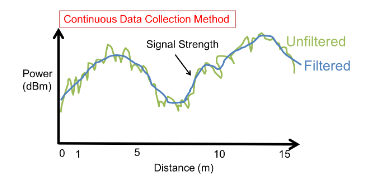

     Figure 1: Continuous Data Collection with Filtering
 
2. Discrete Data Collection: An example representation of data collected at by sampling over a period of time at discrete distances is shown in Figure 2. The data will fluctuate rapidly due to the sampling of a continuous signal, to aid interpretation the data’s mean and standard deviation can be plotted for each distance where samples were collected (as indicated in the figure). Alternatively, a box-and-whisker plot could be generated for each collection event.

    Finally, keep in mind that when analyzing experimental data, it can be useful to consider related information. For example, when analyzing changes in the physical data bit rate, it might be beneficial to consider the received signal strength or SNR and information about the environment (walls, etc.). Similarly, it might be interesting to compare the result of two different experiments when observing the impact of changing a common variable.
    
    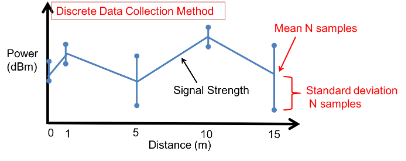
    
    Figure 2: Discrete Data Collection plotting the Mean and Standard Deviation

## Experiments

There are two prescribed experiments and one that is developed by you. Refer to **Appendix A** for the experiment setup instructions.
The experiments that you will be conducting as a portion of this lab are:

### 1. Line of Sight (LOS) Experiment
With the two devices in line of sight (LOS) of each other, collect Wi-Fi packets at varying distances, starting with the devices very close together apart until they are far away. For this experiment, you should pick a location where you can collect data over a long distance, as the trends in the data will be easier to analyze.

**Pre-Experiment Analysis**    
LOS signal strength can be modeled using the Friis transmission equation (Free Space Path Loss). Create a model of your experiment showing how the signal strength will vary with distance, and generate a plot from this model.

**Collect Experiment Data**    
The key data being collected is (1) signal strength and (2) data rate over distance. Refer to **Appendix B** for an example of collected values. Collect this data using the following methods:
* Continuous data collection method
* Discrete data collection method

**Post-Experiment Analysis**    
* Write 1-2 sentences describing your experimental setup.
* Generate a plot of your experimental data with both (1) signal strength and (2) data rate over distance from both the continuous and discrete collection methods (one plot for each method).
* Write 2-3 sentences noting trends or abnormalities in the plots and describing how you processed the data.
* Write 1-2 sentences describing any differences between data collected using the continuous and the discrete data collection methods.
* Write 1-2 sentences on how the results compare with the signal propagation models.

### 2. Non Line of Sight (NLOS) Experiment
With the two devices NOT in line of sight (NLOS) of each other, collect Wi-Fi packets at varying distances, starting with the devices a few centimeters apart until a few meters (like 5 meters, or higher if possible). A simple way to ensure the devices are not in line of sight is to place one device behind a wall or place a cardboard in front of one device.

**Pre-Experiment Analysis**    
Write 1-2 sentences describing your intuition about how the (1) signal strength and (2) data rate over distance will be different from the LOS experiment.

**Collect Experiment Data**  
The key data being collected is (1) signal strength and (2) data rate over distance. Refer to **Appendix B** for an example of collected values. Collect this data using the continuous data collection method.

**Post-Experiment Analysis**    
* Write 1-2 sentences describing your experimental setup.
* Generate a plot of your experimental data with both (1) signal strength and (2) data rate over distance.
* Write 2-3 sentences noting trends or abnormalities in the plots and describing how you processed the data.
* Generate a plot comparing the LOS and NLOS data (1) signal strength and (2) data rate over distance from both the continuous collection method.
* Write 1-2 sentences noting how NLOS data compares to LOS data. Did the results match your intuition?
* Based upon the data from the LOS and NLOS experiments, does the data rate change with signal strength? Was this expected?
* Write 1-2 sentences on how the results compare with signal propagation models.

### 3. Your Experiment
Create your own experiment or choose among these:
* For a fixed distance, experiment in different scenarios, such as when the devices are obstructed by different materials (and/or combinations of materials) such as a metal, a person, a thin wall, a concrete wall.
* Run the LOS experiment in a different space (e.g., outdoor/indoor, hallway/apartment, bedroom/bathroom/living room, etc.) and compare your results.

**Pre-Experiment Analysis**    
Write 1-2 sentences describing your intuition about your experiment.

**Collect Experiment Data**   
Determine the key data to be collected, and collect using the method you determine to be best for your experiment.

**Post-Experiment Analysis**
* Write 1-2 sentences describing your experimental setup.
* Generate a plot of your experimental data.
* Write 2-3 sentences noting trends or abnormalities in the plots and describing how you processed the data.
* Write 1-2 sentences describing any conclusions you can draw from your results.




## Results

Add the following items in the cells below.

### 1. Line of Sight (LOS) Experiment
(a) Plot of your model signal strength and your experimental data signal strength collected using both continuous and discrete techniques compared to distance.   
(b) Plot of your experimental data (1) signal strength and (2) data rate compared to
distance collected using both the continuous and discrete techniques. These can
all be plotted on the same figure where the left y-axis is one unit (e.g. dBm) and
the right y-axis is another unit (e.g. Mb/s). This can be performed in MATLAB
using the the ‘yyaxis’ command.    
(c) Your analysis results, organized as outlined in the ”Post-Experiment Analysis” list under
the LOS experiment in the previous section.

### 2. Non Line of Sight (NLOS) Experiment.
(a) Plot of your experimental data (1) signal strength and (2) data rate compared
to distance collected using the continuous technique, using similar filtering techniques to those used for the LOS data.   
(b) Plot a comparison of the LOS and NLOS (1) signal strength and (2) data rate
compared to distance using the data collected with the continuous technique.   
(c) Your analysis results, organized as outlined in the ”Post-Experiment Analysis” list under
the NLOS experiment in the previous section.

### 3. Your experiment.
(a) Plot your findings.  
(b) Your analysis results, organized as outlined in the ”Post-Experiment Analysis” list under "Your experiment" in the previous section.

In [ ]:
# Add your code/results here as listed in the Results section
# Mention how long you spent on the lab.

## Appendix

### A. Experiment Setup
As mentioned in the preliminary checklist, your setup consists of two devices A and B, where A is running Wireshark and B is an access point communicating with A.

Note - On some laptops, the Wi-Fi interface that Wireshark uses cannot be used for communication. If that is the case, the laptop running Wireshark (A) can be used to monitor Wi-Fi traffic between other pairs of devices, e.g., an access point (B) and your cell phone (C).

1. Follow the instructions in the preliminary checklist to enable monitor mode on your laptop and set up Wireshark to capture packets in monitor mode.

2. Do a sanity check that the measurements are acting as expected. Create a larger separation between the devices, the value of the ‘Signal strength (dBm)’ should decrease.

3. **Apply a Wireshark Display Filter**. For easier analysis, Wireshark allows filtering the display so that only packets with specific properties are displayed. To apply a filter for only viewing packets with a source MAC address of Device B, in the ‘Apply a display filter ...’ window you can type `wlan.sa == <MAC address>`.   
    If you are using your Wi-Fi access point as the Device B, use the command `apr -a` in your terminal to check the MAC address of the access point.   
    You can get more information about display filters [here](https://wiki.wireshark.org/DisplayFilters).
    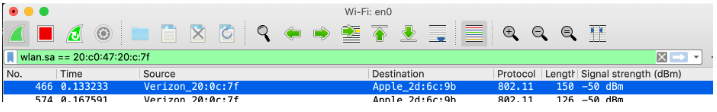
    Figure 3: Using a display filter in Wireshark
    
4. **Save packets to a file.** To process and to display the data collected during experiments, save the data to a file. To save the data collected from a Wireshark capture, select the ‘File’ drop-down menu > ‘Export Packet Dissections’ > select data format.

5. **Adding Data Headers to the Display Window.** Wireshark allows for data in the packet dissections to be added to the display window. This can be beneficial for quick analysis and for post-processing the data using one of the many available file formats. To add a data value from the packet dissections to the display window, right-click on the data item > select ‘Apply as Column’. This will add the value to the display window and cause those values to be saved to the output file.


### B. Data to be Collected
For each experiment, collect the data variables shown in the table below. You may use only some of those variables.
Note: the TSF timestamp is the measure of clock ticks where 1 tick is equivalent to 1 microsecond. The difference between two packets' TSF timestamps is the time difference between the reception of the two packets in microseconds. The Wireshark time value is
within ±5 microseconds of the difference between TSF timestamps.

| Data Category          | Example Value |
|------------------------|---------------|
| PHY type               | 802.11a/n     |
| Data rate              | 6.0 Mb/s      |
| Signal strength (dBm)  | -50 dBm       |
| Noise level (dBm)      | -80 dBm       |
| Frequency              | 2412 MHz      |
| Bandwidth              | 20 MHz        |
| TSF Timestamp          | 2634373546    |

### C. Alternative Approaches

**Wireshark Alternative**

If your wireless card does not support Monitor Mode, you can use any other program to obtain data rate and signal strength data, which are essential for this project. We suggest using the `iwconfig` command, which is a part of the `wireless-tools` Linux package. This command can capture data rate and signal strength information for almost all wireless hardware.

Note that iwconfig does not provide as much information as Wireshark, so it should only be used when Wireshark does not support monitor modes. Alternatively, you can borrow a laptop that does support Wireshark.

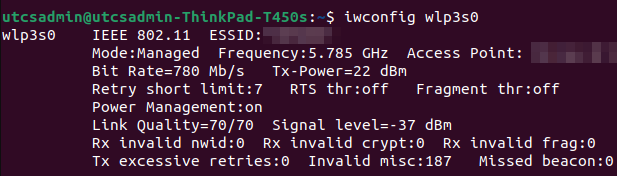

Figure 4: Data returned by iwconfig

To capture the fluctuation in data rate and signal strength, you have to run this command continuously, extract the required data and save the results to a CSV file. One way to do that is writing a bash script, for example:

```bash
#!/bin/bash

#Print CSV header
echo 'Index,BitRate,SignalLevel' > data.csv 

#Run for 100*0.1 = 10s
for i in {1..100}; do
    #Print indices
    echo -n "$i,";

    #Find 'Bit Rate', extract the data between "Bit Rate=" and 'Mb', replace '\n' with ','
    iwconfig wlp3s0 | grep -i 'Bit Rate' | sed -e 's/.*Bit Rate=\(.*\) Mb.*/\1/' | sed -z 's/\n/,/g';

    #Find 'Signal level', extract the data between 'Signal level=' and 'dBm', remove '\n'
    iwconfig wlp3s0 | grep -i 'Signal level' | sed -e 's/.*Signal level=\(.*\) dBm.*/\1/' | sed -z 's/\n//g';

    #Add a newline
    echo "";

    #Repeat every 0.1s
    sleep 0.1;

done >> data.csv 
```
    

## Acknowledgement

This project is adapted from Prof. Peter Steenkiste's [18-750 Wireless Networks and Applications](https://www.cs.cmu.edu/~prs/wirelessS22/) course at Carnegie Mellon University.